# Neural Network
W tym repozytorium ważne są tak naprawdę dwa pliki:
1) Network.py:
 Znajduje się w nim klasa Network będąca implementacją sieci neuronowej, pozwalającej na utworzenie sieci neuronwej z warstwami gęstymi (Fully Connected Layer). Ilość warst w sieci oraz ilość neuronów w każdej warstwie określa się przez argument konstruktora. Klasa implementuje też propagację wsteczną, umożliwia trenowanie sieci i zastosowanie takich regularyzacji jak DropDown, L1/L2 regularisation. Klasa umożliwia też zapisywane sieci w pliku i wczytawanie sieci z pliku.
2) MNIST_loader.py
    W pliku tym znajdują się funkcje pozwalające na załadowanie danych do trenowania i testowania z plików, znajdujących się w katalogu "MNIST", do obiektów ndarray (do tablic numpy). Dane te to MNIST (obrazy ręcznie pisanych cyfr oraz odpowiadające im cyfry).

Instrukcja używania:
Najpierw należy zaimportować wszystkie potrzebne rzeczy.

In [4]:
from Network import Network
import MNIST_loader as MN

Funkcja load_training_tuples zwraza listę tupli (list[tuple[np.ndarray, int]). Pierwszy element każdego tupla to tablica numpy reprezentująca obraz przedstawiający daną cyfrę, drugi element tupli to int będący tą cyfrą. Dokładnie takiej listy będzie wymagała funkcja trenująca sieć.
Funkcja load_test_tuples robi to samo co funkcja load_training_tuples, ale zwraca dane do testowania. (Zbiór MNIST definiuje 60 tyś przykładów do trenowania i 10 tyś przykładów do testowania.)

In [6]:
train_data = MN.load_training_tuples()
test_data = MN.load_test_tuples()

In [19]:
len(train_data), len(test_data)

(60000, 10000)

Jak widać, kształt każdej tablicy numpy reprezentującej obraz to (784,1) (784=28*28).

In [5]:
train_data[47921][0].shape, train_data[47921][1], type(train_data[47921][1])

((784, 1), 4, int)

In [6]:
test_data[5123][0].shape, test_data[5123][1], type(test_data[5123][1])

((784, 1), 4, int)

Do wyświetlenia obrazu można użyć funkcji 'show_image'.

Cyfra odpowiadająca poniższemu obrazowi to 9.


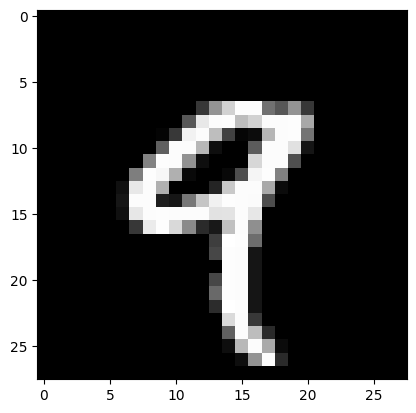

In [10]:
print(f'Cyfra odpowiadająca poniższemu obrazowi to {train_data[4][1]}.')
MN.show_image(train_data[4][0])

Utwórzmy prostą sieć:

In [0]:
my_net1 = Network((784, 30, 10))

Konstruktor wymaga podania kształtu sieci - informacji o tym, ile ma być warstw oraz ile ma być w każdej warstwie neuronów. Opcjonalnie można podać także nazwę sieci.

Do testowania sieci służy metoda test_net. Zwraca ona liczbę wszystkich poprawnie zakwalifikowanych przykładów podzieloną przez liczbę wszystkich przykładów.

In [7]:
my_net1.test_net(train_data), my_net1.test_net(test_data)

(0.09616666666666666, 0.0982)

Jak widać, utworzona sieć, zaincjalizowana losowymi wagami, ma skuteczność 9.61% na zbiorze treningowym i 9.82% na zbiorze testowym. Jest 10 klas, spodziewana spoczątkowa skuteczność to około 10%.

Teraz można zacząć trenować sieć. Służy do tego funkcja 'train'.

- Argument epoch oznacza liczbę epok do wykonania.
- Argument mini_batch_size określa wielkość mini batcha
- Argument eta oznacza learning_rate i określa jej wartość.
- Argument cost_function może przyjmować dwie wartośc. Gdy przujmuje on wartość
1 - do trenowania zostania użyta kwadratowa funkcja kosztu (MSE cost function)
2 -do trenowania zostanie użyta etropiczna funkcja kosztu (entropy cost function)
- Argument test_data jest opcjonalny. Podany oznacza dane, na których sieć będzie testowana po każdej epoce. W przypadku braku tego argumentu (lub jego wartości równej None), sieć nie będzie testowana w trakcie trenowania.
- Argument drop_out oznacza czy podczas trenowania ma zostać użyty dropdown. W przypadku wartości True dropout zostanie zastosowany, w przypadku wartości False dropout nie zostanie zastosowany. Domyślna wartość: False.
- Argument L1_regularization_prm oznacza współczynnik regularacji L1. Jeżeli wartość tego argumentu to None, to regularyzacja L2 nie zostanie zastosowana. Domyślna wartość arguemntu to None.
- Argument L2_regularization_prm oznacza współczynnik regularacji L2. Jeżeli wartość tego argumentu to None, to regularyzacja L2 nie zostanie zastosowana. Domyślna wartość arguemntu to None.

Zapomnijmy na razie regularyzacji, zobaczmy jak sieć wytrenuje się przez 10 epok.  Wyjątkowo co epokę będziemy testować sieć na zbiorze treningowym, na tym samym na którym trenujemy.



In [8]:
my_net1.train(number_of_epochs=10, mini_batch_size=10, eta=0.5, cost_function=1,train_data=train_data,
              test_data=train_data, dropout=False, L2_regularization_prm=None, L1_regularization_prm=None)


Starting training
Finished epoch  0
Efficiency:  0.5433333333333333
Finished epoch  1
Efficiency:  0.6145166666666667
Finished epoch  2
Efficiency:  0.6327833333333334
Finished epoch  3
Efficiency:  0.6421166666666667
Finished epoch  4
Efficiency:  0.6489
Finished epoch  5
Efficiency:  0.6524666666666666
Finished epoch  6
Efficiency:  0.6561666666666667
Finished epoch  7
Efficiency:  0.6591333333333333
Finished epoch  8
Efficiency:  0.66005
Finished epoch  9
Efficiency:  0.6627666666666666


Jak widać po 10 epokach sieć osiągneła skuteczność 0.66. Zobaczmy jaka jest skuteczność sieci na zbiorze testowym.

In [9]:
my_net1.test_net(test_data)

0.6627

Jak widać pomimo braku regularyzacji sieć się nie przetrenowała. Nic dziwnego, architektura sieci jest bardzo prosta. Sieć posiada tylko jedną warstwe ukrytą, posiadającą 30 neuronów.

Stwórzmy teraz nową sieć, o tej samej architekturze, i spróbujmy ja wytrenować z zastosowaniem regularyzacji L2 oraz dropdown'u. Tym razem co epokę będziemy sieć testować na danych testowych, nie używanych podczas trenowania.

In [11]:
my_net2 = Network((784, 30, 10))
my_net2.test_net(train_data), my_net2.test_net(test_data)

(0.106, 0.1059)

In [11]:
my_net2.train(number_of_epochs=10, mini_batch_size=10, eta=0.5, cost_function=1,train_data=train_data,
              test_data=test_data, dropout=True, L2_regularization_prm=0.1, L1_regularization_prm=None)

Starting training
Finished epoch  0
Efficiency:  0.2103
Finished epoch  1
Efficiency:  0.2764
Finished epoch  2
Efficiency:  0.3162
Finished epoch  3
Efficiency:  0.3409
Finished epoch  4
Efficiency:  0.3484
Finished epoch  5
Efficiency:  0.3513
Finished epoch  6
Efficiency:  0.3585
Finished epoch  7
Efficiency:  0.3628
Finished epoch  8
Efficiency:  0.3681
Finished epoch  9
Efficiency:  0.371


In [12]:
my_net2.test_net(train_data)

0.36566666666666664

Po 10 epokach sieć osiągneła skuteczność 37.71% na zbiorze testowym.

Aby zapisać sieć z pliku, a następnie załadować sieć z pliku, należy użyć funkcji save oraz load.

In [16]:
my_net1.save(add_shape = False, name='my_net1')

In [17]:
loaded_network = Network.load('my_net1.network')

In [18]:
loaded_network.test_net(train_data), loaded_network.test_net(test_data)

(0.6627666666666666, 0.6627)

Jak widać sieć 'loaded_network' ma dokładnie taką samą skuteczność jak sieć 'my_net1'. Oczywiście dlatego, że są to dwia dokładnie takie same sieci.